# 0. Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plot_image, plot_image_misclass
from capsnet import CapsNet

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

# 1. Dataset

In [4]:
# data_name_1 = 'MNIST'
# dataset_1 = Dataset(data_name_1)

In [5]:
# n_img = 6
# plot_image(dataset_1.x_test[:n_img], dataset_1.y_test[:n_img], dataset_1.class_names, n_img)
# print(dataset_1.x_test[0].shape, dataset_1.y_test[0].shape)

In [12]:
data_name_2 = 'SMALLNORB'
dataset_2 = Dataset(data_name_2)

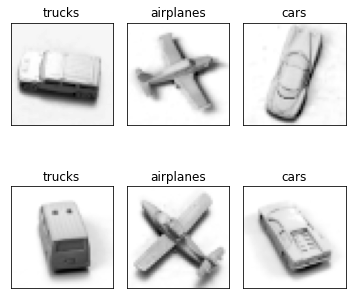

(48, 48, 2) (5,)


In [13]:
n_img = 6
plot_image(dataset_2.x_test[:n_img], dataset_2.y_test[:n_img], dataset_2.class_names, n_img)
print(dataset_2.x_test[0].shape, dataset_2.y_test[0].shape)

# 2. Load Model

In [14]:
model_test = CapsNet(data_name_2, mode='test', r=3)
model_test.load_weight(1)

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 2)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 40, 40, 256)       41728     
_________________________________________________________________
primary_caps (PrimaryCaps)   (None, 16, 16, 32, 8)     5308672   
_________________________________________________________________
digit_caps (DigitCaps)       (None, 5, 16)             5242960   
_________________________________________________________________
length (Length)              (None, 5)                 0         
Total params: 10,593,360
Trainable params: 10,593,360
Non-trainable params: 0
_________________________________________________________________
Model: "Decoder"
_________________________________________________________________
Layer (type)                 O

# 3. Test Model

In [15]:
model_test.evaluate(dataset_2.x_test, dataset_2.y_test)
y_pred = model_test.predict(dataset_2.x_test)[0]

(24300, 48, 48, 2)
(24300, 5)
Test Accuracy: 20.0000%
Test Error: 80.0000%


In [ ]:
n_img = 9
plot_image_misclass(dataset_1.x_test, dataset_1.y_test, y_pred, dataset_1.class_names, n_img)

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir logs/capsnet_MNIST/log/train